# Libaries

In [121]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io as sio
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer

# New Section

Task:
<br> JaMaur:
<br> Yankier:


In [122]:
from google.colab import drive
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


2000-12-07-Now

JaMaur's version

In [123]:
from google.colab import drive
drive.mount('/content/drive/')
%ls "/content/drive/My Drive/CS 498"
!cp "/content/drive/My Drive/CS 498/3638497.csv" "3638497.csv"

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
'/content/drive/My Drive/CS 498'@


Everyone else Move CS 498 to My Drive or use the below



In [124]:
from google.colab import drive
drive.mount('/content/drive/')
%ls "/content/drive/My Drive/CS 498"
!cp "/content/drive/Shared with me/CS 498/3638497.csv" "3638497.csv"

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
'/content/drive/My Drive/CS 498'@
cp: cannot stat '/content/drive/Shared with me/CS 498/3638497.csv': No such file or directory


In [125]:
!ls

3638497.csv  drive  sample_data


In [126]:
df=(pd.read_csv("/content/drive/My Drive/CS 498/3638497.csv"))[42707:]

<ipython-input-126-0f22013fda04>:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df=(pd.read_csv("/content/drive/My Drive/CS 498/3638497.csv"))[42707:]


In [127]:
print(df)

           STATION                                 NAME  LATITUDE  LONGITUDE  \
42707  USW00093820  LEXINGTON BLUE GRASS AIRPORT, KY US   38.0408   -84.6058   
42708  USW00093820  LEXINGTON BLUE GRASS AIRPORT, KY US   38.0408   -84.6058   
42709  USW00093820  LEXINGTON BLUE GRASS AIRPORT, KY US   38.0408   -84.6058   
42710  USW00093820  LEXINGTON BLUE GRASS AIRPORT, KY US   38.0408   -84.6058   
42711  USW00093820  LEXINGTON BLUE GRASS AIRPORT, KY US   38.0408   -84.6058   
...            ...                                  ...       ...        ...   
51206  USW00093820  LEXINGTON BLUE GRASS AIRPORT, KY US   38.0408   -84.6058   
51207  USW00093820  LEXINGTON BLUE GRASS AIRPORT, KY US   38.0408   -84.6058   
51208  USW00093820  LEXINGTON BLUE GRASS AIRPORT, KY US   38.0408   -84.6058   
51209  USW00093820  LEXINGTON BLUE GRASS AIRPORT, KY US   38.0408   -84.6058   
51210  USW00093820  LEXINGTON BLUE GRASS AIRPORT, KY US   38.0408   -84.6058   

       ELEVATION        DATE  PRCP PRCP

In [128]:
dt=df
dt.dropna(inplace=True)

Date Manipulation

In [129]:
dt["DATE"]=pd.to_datetime(dt["DATE"])
dt.insert(6, "Year", 0)
dt.insert(7, "DOY", 0)
dt['Year'] = dt['DATE'].dt.year
dt['DOY'] = dt['DATE'].dt.dayofyear

In [130]:
print(dt)

           STATION                                 NAME  LATITUDE  LONGITUDE  \
42707  USW00093820  LEXINGTON BLUE GRASS AIRPORT, KY US   38.0408   -84.6058   
42708  USW00093820  LEXINGTON BLUE GRASS AIRPORT, KY US   38.0408   -84.6058   
42709  USW00093820  LEXINGTON BLUE GRASS AIRPORT, KY US   38.0408   -84.6058   
42710  USW00093820  LEXINGTON BLUE GRASS AIRPORT, KY US   38.0408   -84.6058   
42711  USW00093820  LEXINGTON BLUE GRASS AIRPORT, KY US   38.0408   -84.6058   
...            ...                                  ...       ...        ...   
51205  USW00093820  LEXINGTON BLUE GRASS AIRPORT, KY US   38.0408   -84.6058   
51206  USW00093820  LEXINGTON BLUE GRASS AIRPORT, KY US   38.0408   -84.6058   
51207  USW00093820  LEXINGTON BLUE GRASS AIRPORT, KY US   38.0408   -84.6058   
51208  USW00093820  LEXINGTON BLUE GRASS AIRPORT, KY US   38.0408   -84.6058   
51209  USW00093820  LEXINGTON BLUE GRASS AIRPORT, KY US   38.0408   -84.6058   

       ELEVATION       DATE  Year  DOY 

In [131]:
temperature = dt[["TAVG", "Year", "DOY", "TMAX", "TMIN"]]
temperature.head()

,TAVG,Year,DOY,TMAX,TMIN
42707,34.0,2000,342,40.0,27.0
42708,34.0,2000,343,43.0,24.0
42709,31.0,2000,344,41.0,20.0
42710,43.0,2000,345,52.0,33.0
42711,41.0,2000,346,54.0,27.0


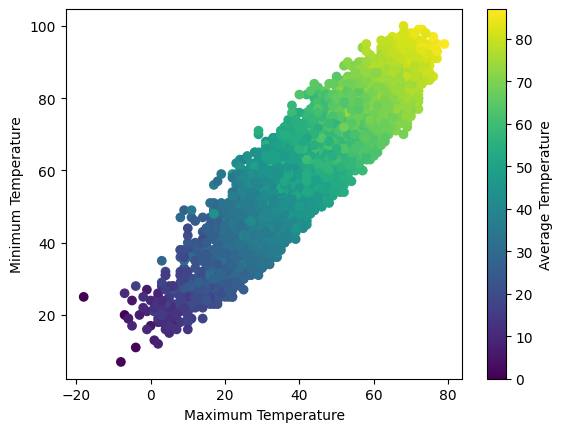

In [132]:
# @title Temperature Ranges vs Average

plt.scatter(df['TMIN'], df['TMAX'], c=df['TAVG'])
plt.xlabel('Maximum Temperature')
plt.ylabel('Minimum Temperature')
_ = plt.colorbar(label='Average Temperature')

Seperate Feature and Target

In [133]:
x=temperature[["TMAX", "TMIN"]]
y=temperature["TAVG"]

In [134]:
x=temperature[["Year", "DOY", "TMAX", "TMIN"]]
y=temperature["TAVG"]

Train-Test Split

In [135]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(x_test.shape, y_test.shape)

(1140, 4) (1140,)


In [136]:
v_train, v_test, w_train, w_test = train_test_split(x, y, test_size=0.2, shuffle=False)

print(v_test, w_test)
print(v_test.shape, w_test.shape)

       Year  DOY  TMAX  TMIN
50070  2021   34  39.0  22.0
50071  2021   35  42.0  22.0
50072  2021   36  41.0  28.0
50073  2021   37  43.0  25.0
50074  2021   38  33.0  18.0
...     ...  ...   ...   ...
51205  2024   74  79.0  56.0
51206  2024   75  63.0  42.0
51207  2024   76  64.0  36.0
51208  2024   77  57.0  36.0
51209  2024   78  39.0  29.0

[1140 rows x 4 columns] 50070    29.0
50071    30.0
50072    35.0
50073    33.0
50074    29.0
         ... 
51205    65.0
51206    60.0
51207    47.0
51208    51.0
51209    36.0
Name: TAVG, Length: 1140, dtype: float64
(1140, 4) (1140,)


Model Selection and Training:
Linear Regression

In [137]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [138]:
model2 = LinearRegression()
model2.fit(v_train, w_train)

LinearRegression()

Model Evaluation

In [139]:
y_pred = model.predict(x_test)

In [140]:
print(y_pred)

[48.85715494 43.86749372 53.04962798 ... 40.28656546 77.76137066
 63.785344  ]


In [141]:
w_pred = model2.predict(v_test)

In [142]:
print("Coefficients: \n", model.coef_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))


Coefficients: 
 [-1.17687271e-02  2.69841044e-04  4.69027045e-01  5.16778695e-01]
Mean squared error: 6.85
Coefficient of determination: 0.98


In [144]:
print("Coefficients: \n", model.coef_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))
print("Coefficients: \n", model2.coef_)
print("Mean squared error: %.2f" % mean_squared_error(w_test, w_pred))
print("Coefficient of determination: %.2f" % r2_score(w_test, w_pred))


Coefficients: 
 [-1.17687271e-02  2.69841044e-04  4.69027045e-01  5.16778695e-01]
Mean squared error: 6.85
Coefficient of determination: 0.98
Coefficients: 
 [-1.79957261e-02  8.69647670e-05  4.69311167e-01  5.17351115e-01]
Mean squared error: 4.71
Coefficient of determination: 0.98


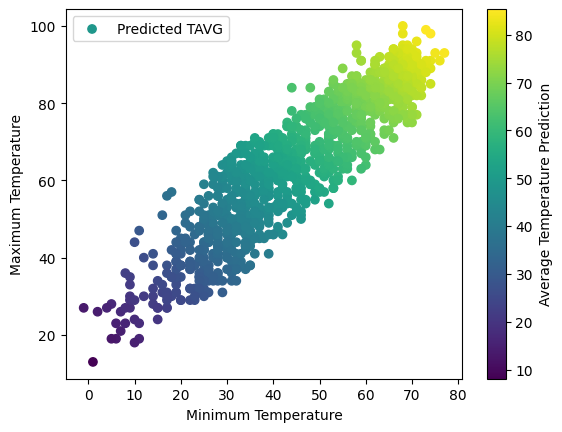

In [145]:
# Splitting x_test into TMAX and TMIN
x_test_TMAX = x_test["TMAX"]
x_test_TMIN = x_test["TMIN"]

# Scatter plot for TMAX vs. predicted TAVG
plt.scatter(x_test_TMIN, x_test_TMAX, c= y_pred, label='Predicted TAVG')

# Scatter plot for TMIN vs. predicted TAVG
#plt.scatter(x_test_TMIN, y_pred, color='orange', label='Predicted TAVG (TMIN)')

plt.xlabel('Minimum Temperature')
plt.ylabel('Maximum Temperature')
plt.colorbar(label='Average Temperature Prediction')
plt.legend()
plt.show()




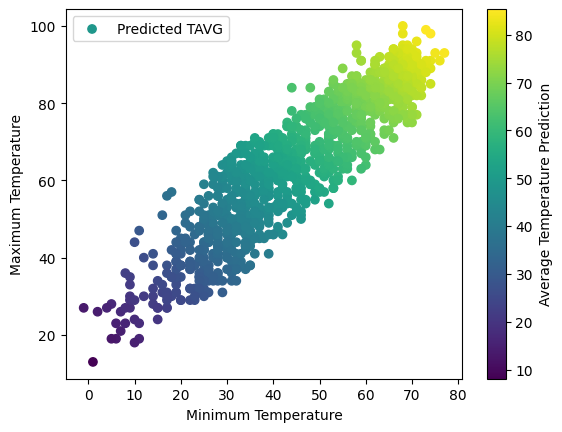

In [146]:
# Splitting x_test into TMAX and TMIN
x_test_TMAX = x_test["TMAX"]
x_test_TMIN = x_test["TMIN"]

# Scatter plot for TMAX vs. predicted TAVG
plt.scatter(x_test_TMIN, x_test_TMAX, c= y_pred, label='Predicted TAVG')

# Scatter plot for TMIN vs. predicted TAVG
#plt.scatter(x_test_TMIN, y_pred, color='orange', label='Predicted TAVG (TMIN)')

plt.xlabel('Minimum Temperature')
plt.ylabel('Maximum Temperature')
plt.colorbar(label='Average Temperature Prediction')
plt.legend()
plt.show()


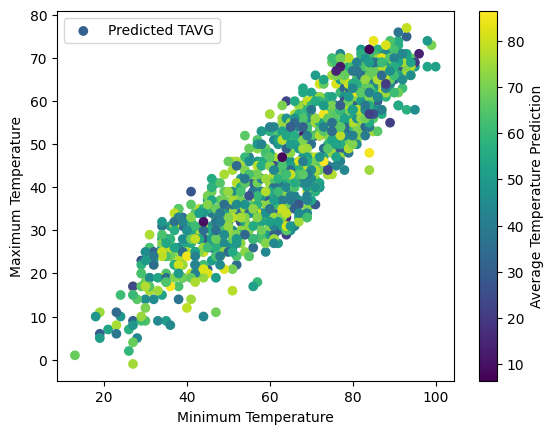

In [147]:
# Scatter plot for predicted TAVG
plt.scatter(x_test_TMAX, x_test_TMIN, c= w_pred, label='Predicted TAVG')


plt.xlabel('Minimum Temperature')
plt.ylabel('Maximum Temperature')
plt.colorbar(label='Average Temperature Prediction')
plt.legend()
plt.show()

In [148]:
temp = pd.DataFrame({
    'Year': [2024],
    'DOY': [91],
    'TAVG': [66],
    'WSF2': [20],
    'WSF5': [30]})
predicted_wind_speed = gb_regressor.predict(day)

print("Predicted Wind Speed for the Day:", predicted_wind_speed[0])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(


NotFittedError: This GradientBoostingRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

Hyperparameter Testing

Predictions and Analysis

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
%ls "/content/drive/My Drive/CS 498"
!cp "/content/drive/Shared with me/CS 498/3638486.csv" "3638486.csv"

In [156]:
fd=(pd.read_csv("/content/drive/My Drive/CS 498/3638486.csv"))[42707:]

<ipython-input-156-ecedb81ac993>:1: DtypeWarning: Columns (7,9,11,13,15,19,25,31,33,35,37,39,41,43,45,47,49,51,53,55,57,59,61,63,65,67,69,71,73,75,77,79,81,83,85,87,89,91) have mixed types. Specify dtype option on import or set low_memory=False.
  fd=(pd.read_csv("/content/drive/My Drive/CS 498/3638486.csv"))[42707:]


In [157]:
print(fd.shape)
print(fd)

(8504, 92)
           STATION                                 NAME  LATITUDE  LONGITUDE  \
42707  USW00093820  LEXINGTON BLUE GRASS AIRPORT, KY US   38.0408   -84.6058   
42708  USW00093820  LEXINGTON BLUE GRASS AIRPORT, KY US   38.0408   -84.6058   
42709  USW00093820  LEXINGTON BLUE GRASS AIRPORT, KY US   38.0408   -84.6058   
42710  USW00093820  LEXINGTON BLUE GRASS AIRPORT, KY US   38.0408   -84.6058   
42711  USW00093820  LEXINGTON BLUE GRASS AIRPORT, KY US   38.0408   -84.6058   
...            ...                                  ...       ...        ...   
51206  USW00093820  LEXINGTON BLUE GRASS AIRPORT, KY US   38.0408   -84.6058   
51207  USW00093820  LEXINGTON BLUE GRASS AIRPORT, KY US   38.0408   -84.6058   
51208  USW00093820  LEXINGTON BLUE GRASS AIRPORT, KY US   38.0408   -84.6058   
51209  USW00093820  LEXINGTON BLUE GRASS AIRPORT, KY US   38.0408   -84.6058   
51210  USW00093820  LEXINGTON BLUE GRASS AIRPORT, KY US   38.0408   -84.6058   

       ELEVATION        DATE

In [158]:
Wind=fd
Wind["DATE"]=pd.to_datetime(Wind["DATE"])
Wind.insert(6, "Year", 0)
Wind.insert(7, "DOY", 0)
Wind['Year'] = Wind['DATE'].dt.year
Wind['DOY'] = Wind['DATE'].dt.dayofyear

In [159]:
print(Wind)

           STATION                                 NAME  LATITUDE  LONGITUDE  \
42707  USW00093820  LEXINGTON BLUE GRASS AIRPORT, KY US   38.0408   -84.6058   
42708  USW00093820  LEXINGTON BLUE GRASS AIRPORT, KY US   38.0408   -84.6058   
42709  USW00093820  LEXINGTON BLUE GRASS AIRPORT, KY US   38.0408   -84.6058   
42710  USW00093820  LEXINGTON BLUE GRASS AIRPORT, KY US   38.0408   -84.6058   
42711  USW00093820  LEXINGTON BLUE GRASS AIRPORT, KY US   38.0408   -84.6058   
...            ...                                  ...       ...        ...   
51206  USW00093820  LEXINGTON BLUE GRASS AIRPORT, KY US   38.0408   -84.6058   
51207  USW00093820  LEXINGTON BLUE GRASS AIRPORT, KY US   38.0408   -84.6058   
51208  USW00093820  LEXINGTON BLUE GRASS AIRPORT, KY US   38.0408   -84.6058   
51209  USW00093820  LEXINGTON BLUE GRASS AIRPORT, KY US   38.0408   -84.6058   
51210  USW00093820  LEXINGTON BLUE GRASS AIRPORT, KY US   38.0408   -84.6058   

       ELEVATION       DATE  Year  DOY 

In [160]:
Windan=Wind[['Year', 'DOY', 'AWND', 'TAVG', 'WDF2', 'WSF2', 'WDF5', 'WSF5']]

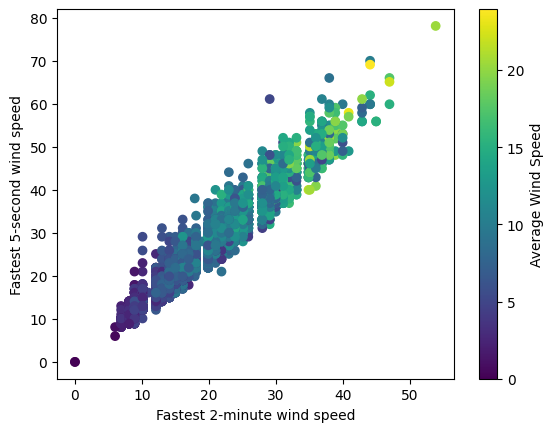

In [161]:
plt.scatter(Windan['WSF2'], Windan['WSF5'], c=Windan['AWND'])
plt.xlabel('Fastest 2-minute wind speed')
plt.ylabel('Fastest 5-second wind speed')
_ = plt.colorbar(label='Average Wind Speed')

In [ ]:
print(Windan)

In [152]:
Windan.dropna(inplace=True)

NameError: name 'Windan' is not defined

In [ ]:
print(Windan.shape)

In [151]:
xw = Windan[['Year', 'DOY', 'TAVG','WSF2', 'WSF5']]
yw = Windan['AWND']

NameError: name 'Windan' is not defined

In [150]:
xw_train, xw_test, yw_train, yw_test = train_test_split(xw, yw, test_size=0.2, random_state=42)

NameError: name 'xw' is not defined

In [ ]:
xw_train, xw_test, yw_train, yw_test = train_test_split(xw, yw, test_size=0.2, shuffle=False)


In [149]:
mw = LinearRegression()
mw.fit(xw_train, yw_train)
yw_pred = mw.predict(xw_test)
msew = mean_squared_error(yw_test, yw_pred)
r2w = r2_score(yw_test, yw_pred)

print("Mean Squared Error:", msew)
print("R-squared:", r2w)

NameError: name 'xw_train' is not defined

In [ ]:
plt.scatter(xw_test['WSF2'], xw_test['WSF5'], c=yw_pred)
plt.xlabel('Fastest 2-minute wind speed')
plt.ylabel('Fastest 5-second wind speed')
_ = plt.colorbar(label='Average Wind Speed')

In [ ]:
gb_regressor = GradientBoostingRegressor()
gb_regressor.fit(xw_train, yw_train)
yw_pred = gb_regressor.predict(xw_test)
msew = mean_squared_error(yw_test, yw_pred)
r2w = r2_score(yw_test, yw_pred)

print("Mean Squared Error:", msew)
print("R-squared:", r2w)

In [ ]:
plt.scatter(xw_test['WSF2'], xw_test['WSF5'], c=yw_pred)
plt.xlabel('Fastest 2-minute wind speed')
plt.ylabel('Fastest 5-second wind speed')
_ = plt.colorbar(label='Average Wind Speed')

In [ ]:
day = pd.DataFrame({
    'Year': [2024],
    'DOY': [91],
    'TAVG': [66],
    'WSF2': [20],
    'WSF5': [30]})
predicted_wind_speed = gb_regressor.predict(day)

print("Predicted Wind Speed for the Day:", predicted_wind_speed[0])

In [ ]:
temp=fd
temp["DATE"]=pd.to_datetime(temp["DATE"])
temp.insert(6, "Year", 0)
temp.insert(7, "DOY", 0)
temp['Year'] = temp['DATE'].dt.year
temp['DOY'] = temp['DATE'].dt.dayofyear

In [ ]:
tempan=temp[['Year', 'DOY', 'AWND', 'TAVG', 'TMIN', 'TMAX']]

In [ ]:
print(tempan)

In [ ]:
plt.scatter(tempan['TMIN'], tempan['TMAX'], c=tempan['TAVG'])
plt.xlabel('Minimum Temp')
plt.ylabel('Maximum Temp')
_ = plt.colorbar(label='Average Temp')

In [ ]:
tempan.dropna(inplace=True)

In [ ]:
xt = tempan[['Year', 'DOY', 'AWND','TMIN', 'TMAX']]
yt = tempan['TAVG']

In [ ]:
xt_train, xt_test, yt_train, yt_test = train_test_split(xt, yt, test_size=0.2, random_state=42)

In [ ]:
mt = LinearRegression()
mt.fit(xt_train, yt_train)
yt_pred = mt.predict(xt_test)
mset = mean_squared_error(yt_test, yt_pred)
r2t = r2_score(yt_test, yt_pred)

print("Mean Squared Error:", mset)
print("R-squared:", r2t)

In [ ]:
plt.scatter(xt_test['TMIN'], xt_test['TMAX'], c=yt_pred)
plt.xlabel('Temperature Min')
plt.ylabel('Temperature Max')
_ = plt.colorbar(label='Average Temperature')

In [ ]:
tday = pd.DataFrame({
    'Year': [2024],
    'DOY': [91],
    'AWND': [8],
    'TMAX': [73],
    'TMIN': [66]})
predicted_temperature = mt.predict(tday)

print("Predicted Wind Speed for the Day:", predicted_wind_speed[0])